<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/PI_ESTIMADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-S-T-I-M-A-C-I-O-N _ D-E _ P-I

Queremos estimar el valor del número $\pi$ para ello tenemos que
$$\hat{\pi} = \frac{4n}{N}$$
donde $n$ es el número de puntos aleatorios que caen dentro de un círculo inscrito en un cuadrado de lado $r$ y $N$ es el número total de puntos generados aleatoriamente dentro de ese cuadrado.

Se generaran $N$ puntos aleatorios dentro de un cuadrado de lado $2r$ donde $r$ es el radio del círculo inscrito.

Podemos relacionar este experimento con una distribución de bernoulli, por lo que tendriamos que:

$$ Éxito (X_i = 1): \text{ el dardo cae dentro del punto } i $$
$$ Fracaso (X_i = 0): \text{ el dardo cae fuera del punto } i $$

Sabemos que la media $\mu$ de la distribución de Bernoulli de $X_i$ es P.

$$ E[X_i] = \mu = 1(P) + 0(1-P) = P$$

Y la varianza

$$ V[X_i] = \sigma^2 = P - P^2 = P(1-P)$$

* Ahora, consideremos a

$$ Z= 4(\frac{x_1 + x_2 + ... + x_N}{N})$$

Con lo anterior calculemos el valor esperado y varianza, asi

$$E[Z]= \frac{4}{N} ( E[x_1]+...+E[x_N])$$

$$ ⟹ E[Z]= \frac{4}{N} (NP) = 4P$$

asi, para la varianza

$$ V[Z] = \frac{16}{N^2}(V(X_1]+...+V[X_N])$$

$$⟹ V[Z] = \frac{16}{N^2} (N)(P(1-P))$$

$$⟹ V[Z]=\frac{16P(1-P)}{N}$$

* Asi podemos usar la desigualdad de Chebyshev

$$ P(|Z_N - \pi| \geq \epsilon ) \leq \frac{V[Z_N]}{\epsilon^2}$$

$$ ⟹ P(|Z_N-\pi | \geq \epsilon) \leq \frac{16P(1-P)}{N\epsilon^2}$$

* Finalmente podemos realizar la simulacion:






In [49]:
#Agregamos las paqueterias correspondientes
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

In [50]:
def genera_puntos(n): #Definimos nuestra función genera_puntos
    contador = 0
    for i in range(n):
        u_1 = rnd.random()  # Generamos nuestros numeros aleatorios
        u_2 = rnd.random()
        if u_2 <= math.sqrt(1 - u_1**2): # Verificamos si el punto cae dentro del sirculo inscrito
            contador += 1 # Si cae dentro lo sumamos al contador
    return contador

In [51]:
def muestra(n): # Definimos nuestra funcion muestra
    x = np.linspace(0, 1, 100) # Crea los puntos en el eje x para dibujar el cuarto de círculo.
    plt.plot(x, np.sqrt(1 - x**2))
    for i in range(n):
        u_1 = rnd.random() #Estas serán las coordenadas (x, y)
        u_2 = rnd.random()
        if u_2 <= math.sqrt(1 - u_1**2): #Verifica si el punto (u_1, u_2) está dentro del cuarto de círculo unitario.
            plt.scatter(u_1, u_2, color='blue')
        else:
            plt.scatter(u_1, u_2, color='red')
    plt.title('Puntos generados')
    plt.xlabel('u_1')
    plt.ylabel('u_2')
    plt.show()

In [52]:
def estimacion_pi(n, num_estimaciones): #Define una función llamada estimacion_p
    estimaciones_pi = []
    for _ in range(num_estimaciones):
        ptos_dentro = genera_puntos(n) #Llama a la función genera_puntos(n) para generar n puntos y contar cuántos de esos puntos caen dentro del cuarto de círculo unitario.
        pi_estimate = (ptos_dentro / n) * 4 #Calcula una estimación de Pi
        estimaciones_pi.append(pi_estimate)
    return estimaciones_pi


In [53]:
# Parámetros
n = 1000
num_estimaciones = 1000

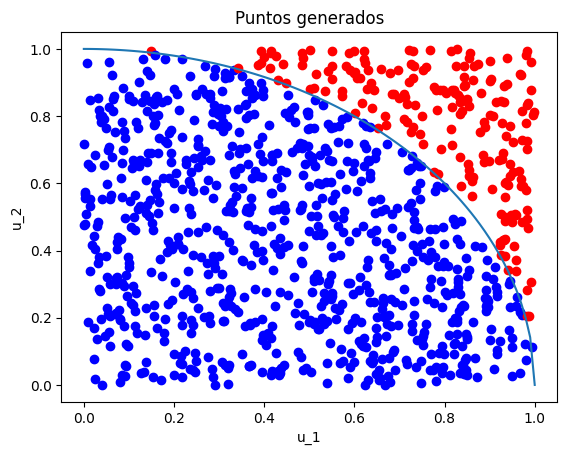

In [54]:
# Generar una muestra y graficar
muestra(n)

In [55]:
def prob_iter(N): # Función para calcular y graficar las probabilidades
    prob = []
    iter = 0 # Número de iteraciones
    X = np.linspace(0, 1, 100)
    for i in range(N):
        iter += genera_puntos(1)
        prob.append(iter / (i + 1)) # Guarda en una lista la probabilidad
    print(iter / N * 4) # Multiplica el último resultado de la probabilidad x 4 para obtener el valor de pi
    return prob

In [56]:
# Calcular las estimaciones de Pi
aux = estimacion_pi(n, num_estimaciones)


In [57]:
# Imprimir la posición y el último valor de las estimaciones de Pi
ultima_posicion = len(aux) - 1  # Obtener la última posición
ultimo_valor_pi = aux[-1]
print(f"Última Estimación de Pi ({ultima_posicion}): {ultimo_valor_pi}")


Última Estimación de Pi (999): 3.164


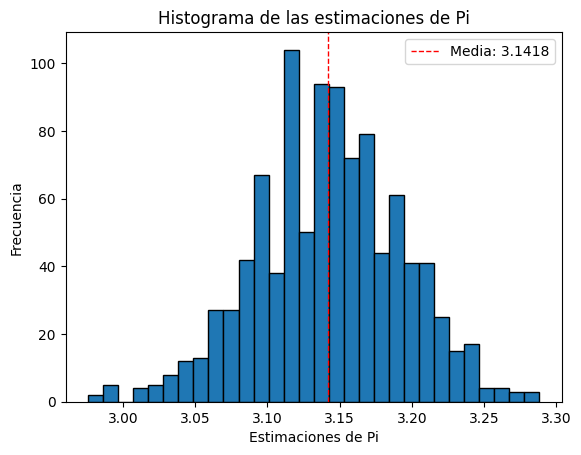

In [58]:
# Graficar el histograma de las estimaciones de Pi
plt.hist(aux, bins=30, edgecolor='black')
plt.title('Histograma de las estimaciones de Pi')
plt.xlabel('Estimaciones de Pi')
plt.ylabel('Frecuencia')
plt.axvline(np.mean(aux), color='r', linestyle='dashed', linewidth=1, label=f'Media: {np.mean(aux):.4f}')
plt.legend()
plt.show()

Vemos que se sigue una distribución normal

In [59]:
mu=np.mean(aux)  #Calculamos la media de estimacion
print(mu)

3.141768


In [60]:
sigma2=np.var(aux) #Calculamos la varianza de la estimacion
print(sigma2)

0.0025557861760000028


3.116


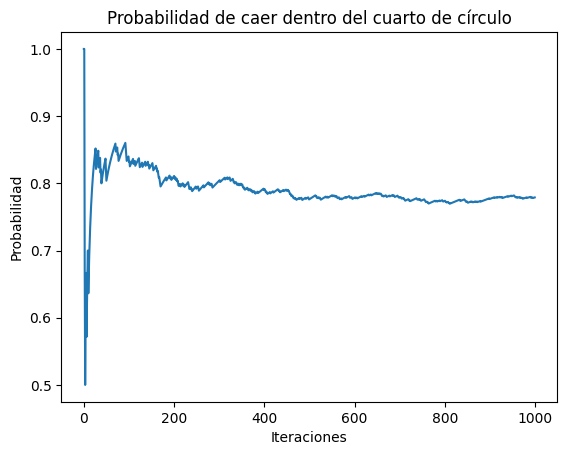

In [61]:
# Calcular y graficar las probabilidades
N = 1000
probabilidades = prob_iter(N)

# Graficar las probabilidades
plt.plot(probabilidades)
plt.title('Probabilidad de caer dentro del cuarto de círculo')
plt.xlabel('Iteraciones')
plt.ylabel('Probabilidad')
plt.show()